In [1]:
include("../code/headers.jl")

In [2]:
n = factorial(7)
k = 3:10
R = 1 .- 2 ./k
m_ = n*(1 .- R)
m = Int.(round.(m_))
m_

8-element Array{Float64,1}:
 3360.0
 2520.0
 2016.0
 1679.9999999999995
 1440.0
 1260.0
 1120.0
 1007.9999999999998

In [3]:
sims = Vector{Simulation{MS}}(undef, length(m))
algo = MS(maxiter=100, Tmax=1, gamma=1e-3, sigma=0.0)

MS
  maxiter: Int64 100
  convergence: Symbol parity
  nmin: Int64 300
  tol: Float64 1.0e-12
  gamma: Float64 0.001
  Tmax: Int64 1
  beta2: Float64 1.0
  sigma: Float64 0.0
  default_distortion: fix_indep_from_ms (function of type typeof(fix_indep_from_ms))


In [ ]:
for j in eachindex(m)
    println("Rate $(round(R[j],digits=2)). $j of $(length(m))")
    sims[j] = Simulation(2, n, m[j], algo, niter=10, verbose=true, showprogress=false)
end

Rate 0.33. 1 of 8
  1 of 10: U after 100 iters, 1 trials. Parity   4. Dist 0.21.
  2 of 10: 

In [33]:
dist = mean.(distortion.(sims));

In [34]:
[k dist]

8×2 Array{Float64,2}:
  3.0  0.211429
  4.0  0.142063
  5.0  0.108413
  6.0  0.0893849
  7.0  0.0757341
  8.0  0.0646627
  9.0  0.057619
 10.0  0.0513095

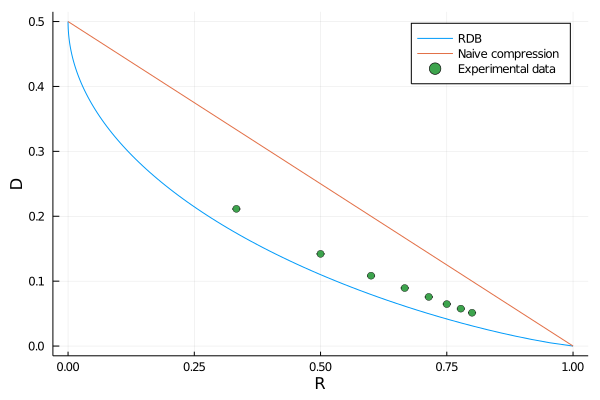

In [32]:
plot(sims)